<a href="https://colab.research.google.com/github/bagustris/linear-filter/blob/master/iir_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Processing With Scipy: Linear Filter

There are two main classes of linear filters from temporal domain point of view: finite impulse response (FIR) filters, and infinite impulse response (IIR) filters. In the following two sections, we will discuss many of the functions that SciPy provides for the design and analysis of both types of filters.

## IIR filter in `scipy.signal`

An IIR filter can be written as a linear recurrence relation, in which the
output $y_{_n}$ is a linear combination of $x_{_n}$, the $M$ previous
values of $x$ and the $N$ previous values of $y$


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.set_printoptions(precision=3, linewidth=50)

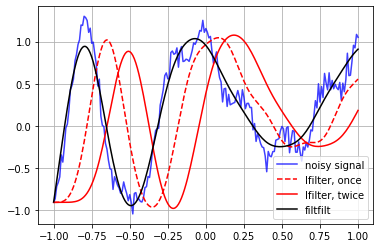

In [22]:
## from scipy.signal.filter demo
# create random value
rng = np.random.default_rng()
t = np.linspace(-1, 1, 201)

# generate signal
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))

# add noise
xn = x + rng.standard_normal(len(t)) * 0.08

# Create an order 3 lowpass butterworth filter:
b, a = signal.butter(3, 0.05)

#Apply the filter to xn. Use lfilter_zi to choose the initial condition of the filter:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

# Apply the filter again, to have a result filtered at an order the same as filtfilt:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

# Use filtfilt to apply the filter:
y = signal.filtfilt(b, a, xn)

# Plot the original signal and the various filtered versions:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), 
           loc='best')
plt.grid(True)
plt.show()

Let's dive deeper into scipy.signal

In [23]:
b, a = signal.butter(6, 0.125)   # low-pass, order=6, cut-off=1/8 (0.125)

In [24]:
b

array([2.883e-05, 1.730e-04, 4.324e-04,
       5.765e-04, 4.324e-04, 1.730e-04,
       2.883e-05])

In [25]:
a

array([ 1.   , -4.485,  8.529, -8.779,  5.148,
       -1.628,  0.217])

In [26]:
z, p, k = signal.butter(6, 0.125, output='zpk') # now using zpk argument

In [27]:
z

array([-1., -1., -1., -1., -1., -1.])

In [28]:
p

array([0.841+0.336j, 0.727+0.213j, 0.675+0.072j,
       0.675-0.072j, 0.727-0.213j, 0.841-0.336j])

In [29]:
k

2.882589194400281e-05

In [30]:
sos = signal.butter(6, 0.125, output="sos")
sos

array([[ 2.883e-05,  5.765e-05,  2.883e-05,
         1.000e+00, -1.349e+00,  4.602e-01],
       [ 1.000e+00,  2.000e+00,  1.000e+00,
         1.000e+00, -1.454e+00,  5.741e-01],
       [ 1.000e+00,  2.000e+00,  1.000e+00,
         1.000e+00, -1.681e+00,  8.198e-01]])

In [31]:
signal.zpk2sos(z, p, k)

array([[ 2.883e-05,  5.765e-05,  2.883e-05,
         1.000e+00, -1.349e+00,  4.602e-01],
       [ 1.000e+00,  2.000e+00,  1.000e+00,
         1.000e+00, -1.454e+00,  5.741e-01],
       [ 1.000e+00,  2.000e+00,  1.000e+00,
         1.000e+00, -1.681e+00,  8.198e-01]])

In [13]:
b, a = signal.butter(10, [0.04, 0.16], btype="bandpass")

In [14]:
x = np.ones(125)

In [32]:
y = signal.lfilter(b, a, x)

In [33]:
y

array([-2.339e-05, -2.672e-04, -1.502e-03,
       -5.600e-03, -1.575e-02, -3.597e-02,
       -7.000e-02, -1.200e-01, -1.853e-01,
       -2.621e-01, -3.437e-01, -4.211e-01,
       -4.844e-01, -5.245e-01, -5.337e-01,
       -5.072e-01, -4.436e-01, -3.446e-01,
       -2.148e-01, -6.121e-02,  1.081e-01,
        2.844e-01,  4.595e-01,  6.262e-01,
        7.787e-01,  9.125e-01,  1.025e+00,
        1.114e+00,  1.180e+00,  1.223e+00,
        1.242e+00,  1.240e+00,  1.216e+00,
        1.171e+00,  1.106e+00,  1.023e+00,
        9.230e-01,  8.075e-01,  6.792e-01,
        5.410e-01,  3.961e-01,  2.483e-01,
        1.013e-01, -4.132e-02, -1.760e-01,
       -3.000e-01, -4.108e-01, -5.071e-01,
       -5.881e-01, -6.538e-01, -7.052e-01,
       -7.436e-01, -7.711e-01, -7.898e-01,
       -8.021e-01, -8.103e-01, -8.164e-01,
       -8.220e-01, -8.285e-01, -8.363e-01,
       -8.458e-01, -8.562e-01, -8.668e-01,
       -8.761e-01, -8.824e-01, -8.838e-01,
       -8.783e-01, -8.641e-01, -8.393e-01,
       -8.0

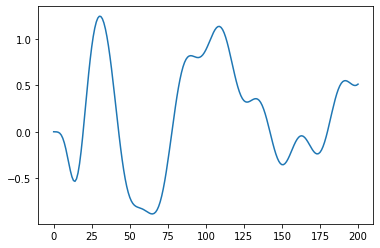

In [34]:
plt.plot(y)

In [36]:
z, p, k = signal.tf2zpk(b, a)
np.abs(p)

array([0.905, 0.905, 0.758, 0.758, 0.678, 0.678])

In [37]:
sos = butter(10, [0.04, 0.16], btype="bandpass", output="sos")

In [38]:
z, p, k = signal.sos2zpk(sos)
np.abs(p)

array([0.788, 0.788, 0.8  , 0.8  , 0.818, 0.818,
       0.854, 0.854, 0.877, 0.877, 0.903, 0.903,
       0.936, 0.936, 0.955, 0.955, 0.964, 0.964,
       0.988, 0.988])

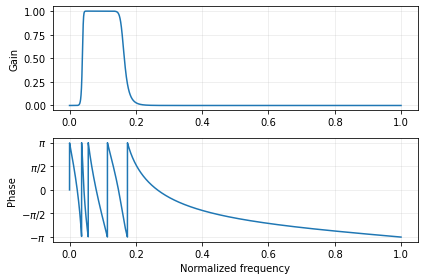

In [49]:
# plot signal and frequency response
w, h = signal.sosfreqz(sos, worN=8000)

plt.figure() # to control size: figsize=(10.0, 10.0)
plt.subplot(211)
plt.plot(w/np.pi, np.abs(h))
plt.grid(alpha=0.25)
plt.ylabel('Gain')
plt.subplot(212)
plt.plot(w/np.pi, np.angle(h))
yaxis = plt.gca().yaxis
yaxis.set_ticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi])
yaxis.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.xlabel('Normalized frequency')
plt.grid(alpha=0.25)
plt.ylabel('Phase')
plt.tight_layout()

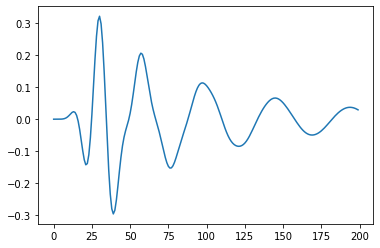

In [41]:
# compute step response of ones
x = np.ones(200)
y = signal.sosfilt(sos, x)
plt.plot(y)

In [69]:
# make function to modify butteworth signal
def butter_lowpass(cutoff, fs, order):
  normal_cutoff = cutoff / (0.5*fs)
  sos = signal.butter(order, normal_cutoff, btype='low', output='sos')
  return sos

def butter_lowpass_filtfilt(data, cutoff, fs, order):
  sos = butter_lowpass(cutoff, fs, order=order)
  y = signal.sosfiltfilt(sos, data)
  return y

In [70]:
# function to create data
def make_data(T, fs):
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.025
    f0 = 550.0
    x = 0.07 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    return t, x

In [73]:
# create waveform plot and spectrogram
T = 50
fs = 50000
time, pressure = make_data(T, fs)

t0 = time.min()
t1 = time.max()

nperseg = 80
noverlap = nperseg - 4
f, t, spec = signal.spectrogram(pressure, fs=fs, nperseg=nperseg, 
                                noverlap=noverlap, window='hann')


t += t0/1000

cutoff = 1250
pressure_filtered = butter_lowpass_filtfilt(pressure, cutoff, fs, order=8)
f, t, filteredspec = signal.spectrogram(pressure_filtered, fs=fs, nperseg=nperseg,
                                 noverlap=noverlap, window='hann')
t += t0/1000

tlo = t[0]*1000
thi = t[-1]*1000

# convert to log-scale
spec_db = 10*np.log10(spec)
filteredspec_db = 10*np.log10(filteredspec)

In [ ]:
# plot
vmax = max(spec_db.max(), filteredspec_db.max())
vmin = vmax - 80.0  # Clip display of values below 80 dB
linecolor = 'k'
cmap = plt.cm.coolwarm

plt.figure(figsize=(4.0, 4.5))
plt.subplot(211)
plt.plot(time, pressure, color=linecolor, alpha=0.8)
plt.xlim(tlo, thi)
plt.ylim(0, 10)
plt.ylabel("Pressure (MPa)")
plt.grid(alpha=0.25)

plt.subplot(212)
plt.pcolormesh(1000*t, f/1000, spec_db, vmin=vmin, vmax=vmax,
               cmap=cmap, shading='gouraud')
plt.xlim(tlo, thi)
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (ms)')
plt.tight_layout()
# plt.savefig("pressure_example_input.pdf")

plt.figure(2, figsize=(4.0, 4.5))
plt.subplot(211)
plt.plot(time, pressure, color=linecolor, alpha=0.15)
plt.plot(time, pressure_filtered, color=linecolor, alpha=0.8)
plt.xlim(tlo, thi)
plt.ylim(0, 10)
plt.ylabel("Pressure (MPa)")
plt.grid(alpha=0.25)

plt.subplot(212)
plt.pcolormesh(1000*t, f/1000, filteredspec_db, vmin=vmin, vmax=vmax,
               cmap=cmap, shading='gouraud')
plt.axhline(cutoff/1000, color='k', linestyle='--', linewidth=1, alpha=0.5)
plt.xlim(tlo, thi)
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (ms)')
plt.tight_layout()